## Problem Statement: 
Given performance with time for some values, create a model to predict performance for unknown time values

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

## Section 1: Load and Visualise the data
- Load
- Visualise
- Normalize

In [43]:
# Load
X = pd.read_csv('./Training Data/Linear_X_Train.csv')
Y = pd.read_csv('./Training Data/Linear_Y_Train.csv')

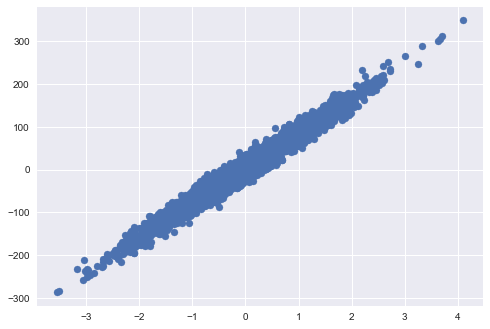

In [44]:
# Visualize
plt.style.use('seaborn')
plt.scatter(X, Y)
plt.show()

In [45]:
print(X.shape, Y.shape)

(3750, 1) (3750, 1)


In [46]:
# Covert X and Y to numpy array
X = X.values
Y = Y.values

In [47]:
# Normalize (normalization is always done on the X values and not on the Y values)
u = X.mean()
std = X.std()

In [48]:
print(u, std)

-0.03779466168006854 0.9920801322508517


Since standard deviation is close to 1, the data is already normalized, still we can apply the formula to normalize it further

In [49]:
X = (X - u)/std

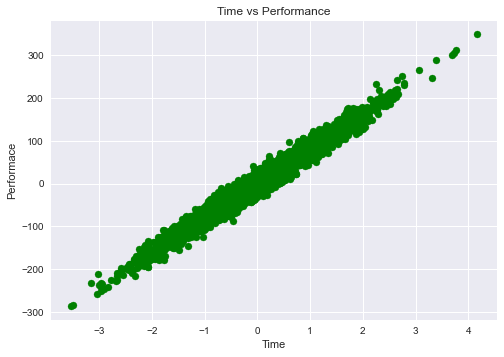

In [50]:
plt.scatter(X, Y, color='green')
plt.title('Time vs Performance')
plt.xlabel('Time')
plt.ylabel('Performace')
plt.show()

This is a linear regression problem as with time spent, performace is increasing

## Section 2: Linear Regression

In [51]:
# theta = [theta0, theta1]
def hypothesis(x, theta):
    y_hat = theta[0] + theta[1]*x
    return y_hat

In [52]:
# computes grad[0] and grad[1]
def gradient(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_hat = hypothesis(x, theta)
        y = Y[i]
        grad[0] += (y_hat - y)
        grad[1] += (y_hat - y)*x
    return grad/m

In [53]:
def error(X, Y, theta):
    m = X.shape[0]
    totalError = 0.0
    for i in range(m):
        y_hat = hypothesis(X[i], theta)
        totalError += (y_hat - Y[i])**2
    return totalError/m 

In [54]:
def gradientDescent(X, Y, maxSteps = 100, learningRate = 0.1):
    theta = np.zeros((2,))
    errorList = []
    for i in range(maxSteps):
        # Compute gradient
        grad = gradient(X, Y, theta)
        # Compute error
        err = error(X, Y, theta)
        errorList.append(err)
        # Update Theta
        theta[0] = theta[0] - learningRate * grad[0]
        theta[1] = theta[1] - learningRate * grad[1]
    return theta, errorList

In [55]:
theta, errorList = gradientDescent(X, Y)

In [56]:
theta

array([ 0.6838508 , 79.90361453])

In [57]:
errorList

[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array(

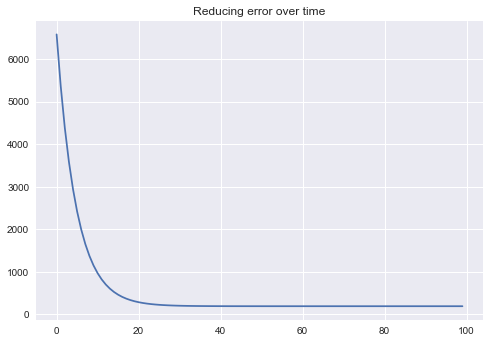

In [58]:
plt.plot(errorList)
plt.title("Reducing error over time")
plt.show()

## Section 3: Predictions and Best Line

In [59]:
y_hat = hypothesis(X, theta)
print(y_hat)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


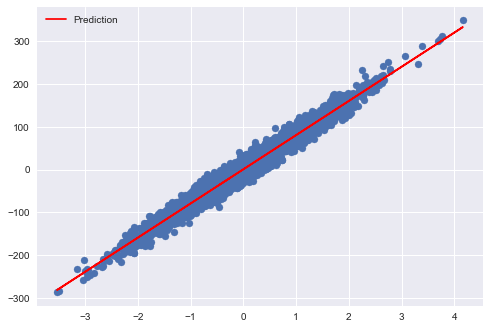

In [60]:
# plotting training data and predictions
plt.scatter(X, Y)
plt.plot(X, y_hat, color = 'red', label="Prediction")
plt.legend()
plt.show()

In [61]:
# Loading the test data
x_test = pd.read_csv('./Test Cases/Linear_X_Test.csv').values
y_test = hypothesis(x_test, theta)

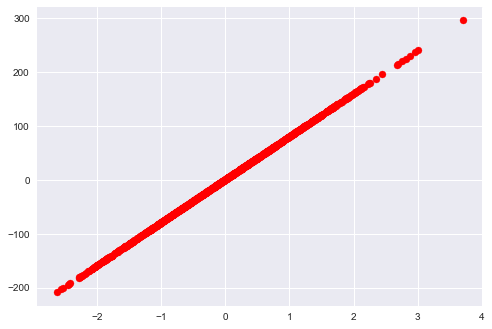

In [62]:
plt.scatter(x_test, y_test, color='red')
plt.show()

In [63]:
def R2Score(Y ,Y_hat):
    # np.sum is faster than loop
    numerator = np.sum((Y - Y_hat)**2)
    denominator = np.sum((Y - Y.mean())**2)
    score = 1 - (numerator/denominator)
    return score*100

In [64]:
R2Score(Y, y_hat)

97.09612226971643

## Section 3: Visualizing Loss Function, Gradient Descent and Theta Updates

In [65]:
theta 

array([ 0.6838508 , 79.90361453])

In [76]:
T0 = np.arange(-40, 40, 1)
T1 = np.arange(40, 120, 1)
T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)

In [82]:
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_hat = T1[i, j]*X+ T0[i, j]
        J[i, j] = np.sum((Y - y_hat)**2)

In [83]:
print(J)

[[12894752.304387   12593373.28712689 12299494.26986677 ...
  11633567.975358   11909688.95809788 12193309.94083777]
 [12599209.27731825 12297830.26005814 12003951.24279802 ...
  11338024.94828925 11614145.93102914 11897766.91376902]
 [12311166.25024951 12009787.23298939 11715908.21572927 ...
  11049981.9212205  11326102.90396039 11609723.88670027]
 ...
 [12082939.22009338 11781560.20283326 11487681.18557315 ...
  10821754.89106438 11097875.87380426 11381496.85654414]
 [12364896.19302463 12063517.17576451 11769638.1585044  ...
  11103711.86399563 11379832.84673551 11663453.8294754 ]
 [12654353.16595588 12352974.14869577 12059095.13143565 ...
  11393168.83692688 11669289.81966676 11952910.80240665]]


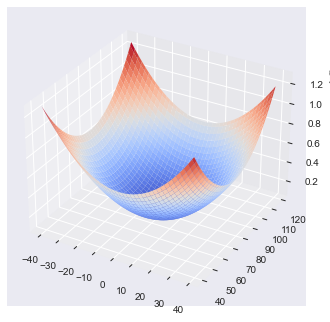

In [84]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0, T1, J, cmap='coolwarm')
plt.show()

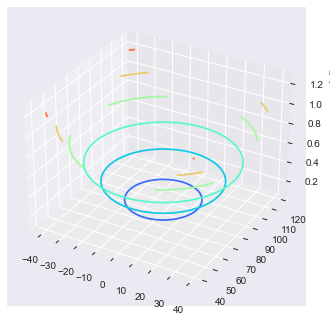

In [86]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0, T1, J, cmap='rainbow')
plt.show()